# Cars 4u Project

## Context
There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

 

## Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

Dataset Download Dataset:

## Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

** Data Dictionary **

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in dollars
- Price: The price of the used car in dollars

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
#pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load the dataset

In [2]:
# loading the dataset
data = pd.read_csv('used_cars_data-1.csv')

### Explore the data

In [3]:
# checking shape of the data

data.shape

(7253, 14)

- There are 7253 rows and 14 columns

In [4]:
# let's view a sample of the data
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [5]:
# let's create a copy of the data

df = data.copy()

In [6]:
# drop the S.No column and name as it does not add any value to the analysis

df.drop(['S.No.', 'Name'], axis=1, inplace=True)


In [7]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           7253 non-null   object 
 1   Year               7253 non-null   int64  
 2   Kilometers_Driven  7253 non-null   int64  
 3   Fuel_Type          7253 non-null   object 
 4   Transmission       7253 non-null   object 
 5   Owner_Type         7253 non-null   object 
 6   Mileage            7251 non-null   object 
 7   Engine             7207 non-null   object 
 8   Power              7078 non-null   object 
 9   Seats              7200 non-null   float64
 10  New_Price          7253 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 680.1+ KB


**Observations**

- *Location*, *Year*, *Fuel_Type*, *Transmission*, *Owner_Type* and *Seats* are categorical-type variables.
- *Name* and *Location*, are strings variables.
- All other variables are numerical in nature.

In [8]:
# checking for duplicate values

df.duplicated().sum()

3

- There is 3 duplicate value in the data.
- We will drop the duplicate values.

In [9]:
# drop the duplicates

df.drop_duplicates(inplace=True)

# reset the index

df.reset_index(drop=True, inplace=True)

In [10]:
# Let's look at the statistical summary of the data

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7250,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7250.0,NaN,NaN,NaN,2013.366207,3.253715,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7250.0,NaN,NaN,NaN,58707.187586,84443.411557,171.0,34000.0,53469.5,73000.0,6500000.0
Fuel_Type,7250,5,Diesel,3851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7250,2,Manual,5201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7250,4,First,5949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7248,450,17.0 kmpl,206,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7204,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7075,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seats,7197.0,NaN,NaN,NaN,5.279839,0.811809,0.0,5.0,5.0,5.0,10.0


**Observations**

- The year of the vehicle is from 1996 to 2019.
- There are car with no seat. we need to investigate that further.
- There are quite a few missing values in the data.
- we also need to put some data in the right format
- put some features in the right Data type
- A vehicle having a mileage of 6.5million needs to be investigated

In [11]:
# Get all the columns in the data set
cols = df.columns.to_list()

cols

['Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [12]:
# print out all the frequency for each variables

for col in cols:
    print(df[col].value_counts())
    print('*' * 50)

Mumbai        948
Hyderabad     875
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       653
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
**************************************************
2015    929
2014    925
2016    886
2013    791
2017    708
2012    690
2011    579
2010    406
2018    361
2009    252
2008    207
2007    147
2019    119
2006     89
2005     68
2004     35
2003     20
2002     18
2001      8
2000      5
1998      4
1999      2
1996      1
Name: Year, dtype: int64
**************************************************
60000    96
45000    86
65000    86
70000    77
50000    72
         ..
87200     1
48324     1
20773     1
66355     1
72443     1
Name: Kilometers_Driven, Length: 3660, dtype: int64
**************************************************
Diesel      3851
Petrol      3323
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
********************

**Observations**

- Mileage has multiple unit we must convert it to a single unit
- MIleage, Power and Engine must be converted to numeric data types

## Data Cleaning

### Missing Value Treatment

- Let's check for missing values in the data.

In [13]:
# check for missing values

df.isnull().sum()


Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1232
dtype: int64

In [14]:
# Drop missing values in the target variable because target variable CANNOT have missing values
# Drop missing values in other variable(since they are insignificant)

df.dropna(inplace=True)

### Formating the Mileage variable

- Let's convert mileage to a single unit
- Convert it to numerical data type

In [15]:
# checking the distribution for kmpl and km/kg

kmkg = 0
kmpl = 0
for i in df.Mileage:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Km/Kg : {} '.format(kmkg))
print('The number of rows with Kmpl : {} '.format(kmpl))

The number of rows with Km/Kg : 65 
The number of rows with Kmpl : 5806 


**Observations**

- Majority of it are in Kmpl

In [16]:
# convert all km/kg to kmpl and make it a numeric data type

Correct_Mileage= []
for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        #print(i)
        Correct_Mileage.append(float(i))


In [17]:
df['Mileage']=Correct_Mileage

### Formating the Engine variable

- Convert it to numerical data type

In [18]:
## remove CC attached to engine

numerical_Engine= []
for i in df.Engine:
    i = i[:-3]
    numerical_Engine.append(int(i))
    

In [19]:
df['Engine']=numerical_Engine

### Formating the Power variable

- Convert it to numerical data type

In [20]:
## remove bhp attached to power

numerical_Power= []
for i in df.Power:
    i = i[:-4]
    numerical_Power.append(float(i))

In [21]:
df['Power']=numerical_Power

### Get Unique values in  categoirical variables

In [22]:
# select categorical variables

cat_cols = df.select_dtypes(include='object').columns.to_list()

cat_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [23]:
# print out all the categories and frequency for each categorical variables

for col in cat_cols:
    print(df[col].value_counts())
    print('*' * 50)

Mumbai        775
Hyderabad     717
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64
**************************************************
Diesel    3152
Petrol    2654
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64
**************************************************
Manual       4169
Automatic    1702
Name: Transmission, dtype: int64
**************************************************
First             4838
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64
**************************************************


#### Observations

- The cars are in 11 locaions with majority of it in Mumbai.
- The Fuel type has five(5) category with most of the cars being diesel engines'.
- The transmission type is either Automatic or Manual with majority being manual.

## Exploratory Data Analysis

### Univariate Analysis
- Here, we will use our utility functions for visualization

In [24]:
from utils import histogram_boxplot, labeled_barplot

### Numerical Plots

***Price* (the target variable)**

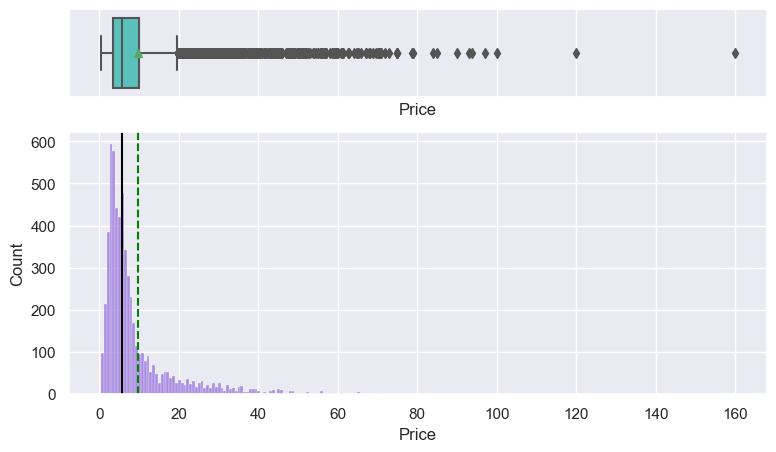

In [25]:
histogram_boxplot(data = df, feature = "Price")

**Observations**

- *Price* is right-skewed hence the normality assumption of linear regression is violated. We will need to take the log of it to make it normally distributed.
- There are a lot of outliers at the upper ends.

**log of price**

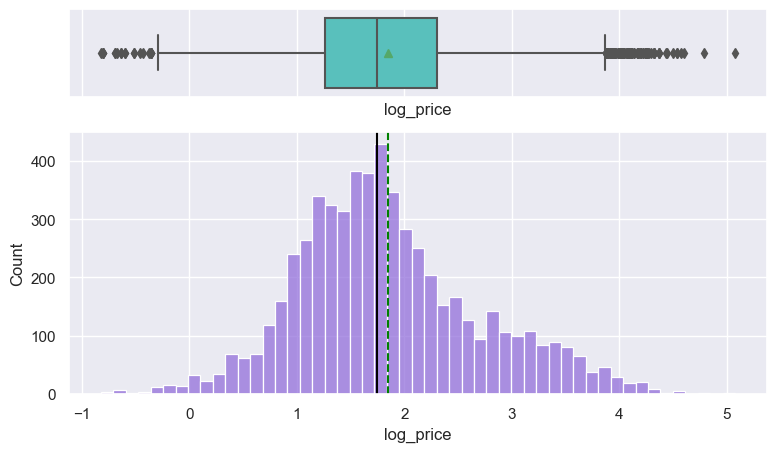

In [26]:
# How do we get the log of price from the price

df["log_price"] = np.log(df["Price"])

histogram_boxplot(df, "log_price")

**Observations**

- *log_price* is now normally distributed.
- There are a few outliers both at the upper and lower ends.

In [27]:
# drop the price column


df.drop("Price", axis=1, inplace=True)

***New Price***

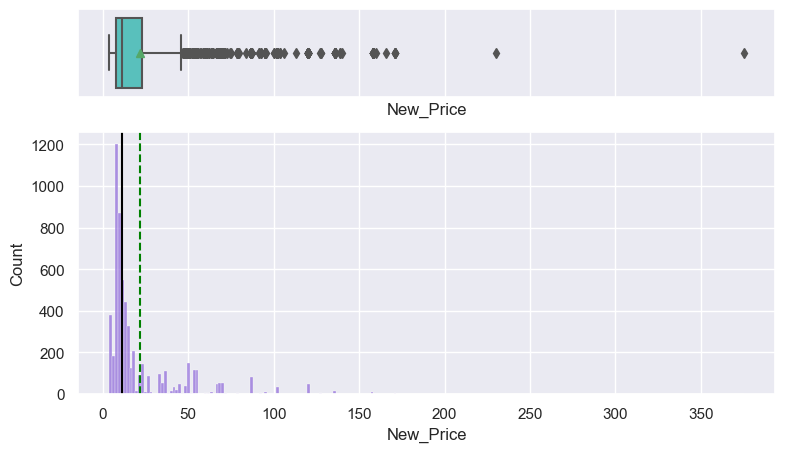

In [28]:
histogram_boxplot(df, "New_Price")

**Observations**

- The price of new car is right-skewed and there are many upper outliers

***Seats***

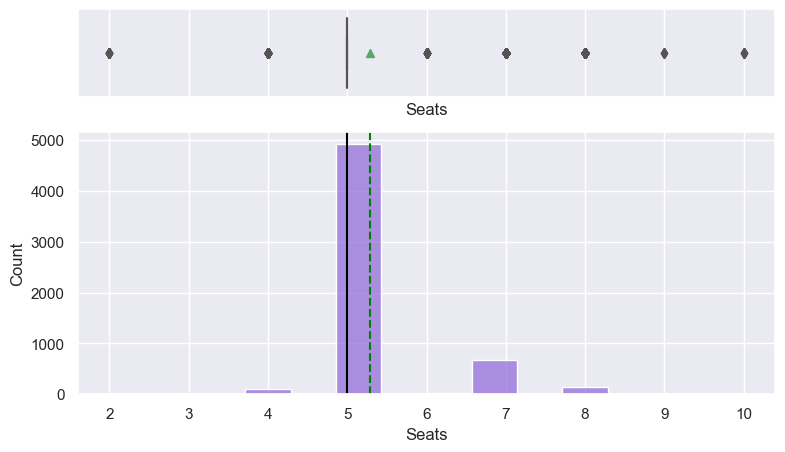

In [29]:
histogram_boxplot(df, "Seats")

**Observations**

- The columns seems to have a lot of discrete values.

***Power***

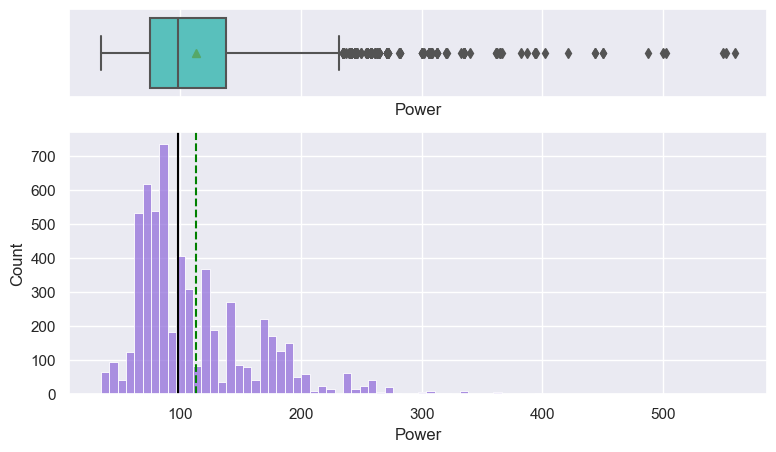

In [30]:
histogram_boxplot(df, "Power")

**Observations**

- The Power variable is right-skewed and there are many upper outliers

***Engine***

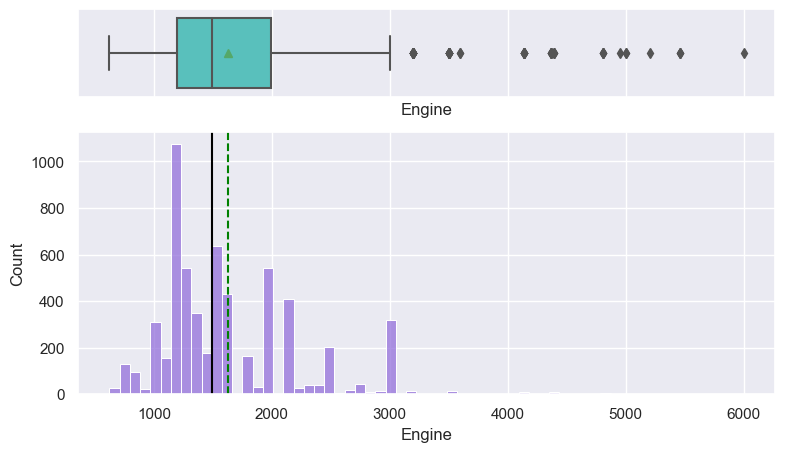

In [31]:
histogram_boxplot(df, "Engine")

**Observations**

- The Engine variable is left-skewed and there are many upper outliers

***Mileage***

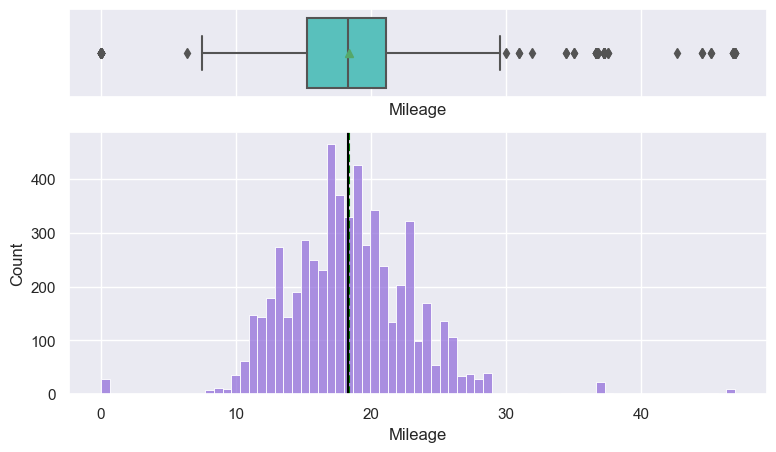

In [32]:
histogram_boxplot(df, "Mileage")

**Observations**

- The Engine variable is normally distributed and most outliers are in the upper region

***Kilometer Driven***

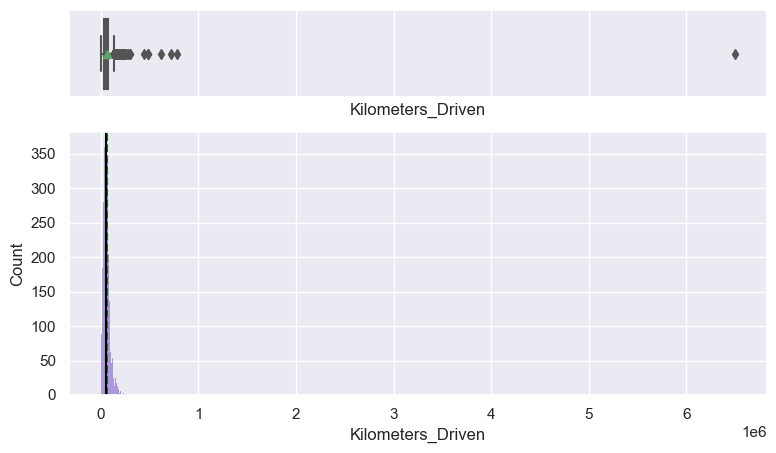

In [33]:
histogram_boxplot(df, "Kilometers_Driven") 

**Observations**

- The outlier is not making us see the distribution well

***Year***

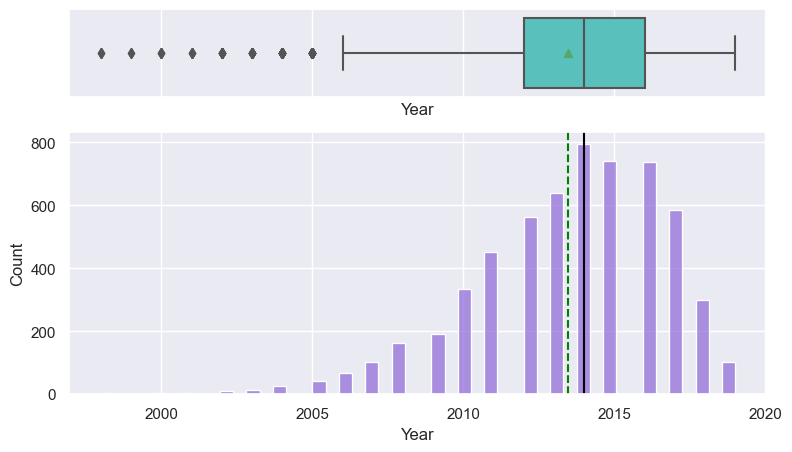

In [34]:
histogram_boxplot(df, "Year") 

**Observations**

- The distribution is left-skewed and we have most outliers at the button

### Categorical Plots

***Location***

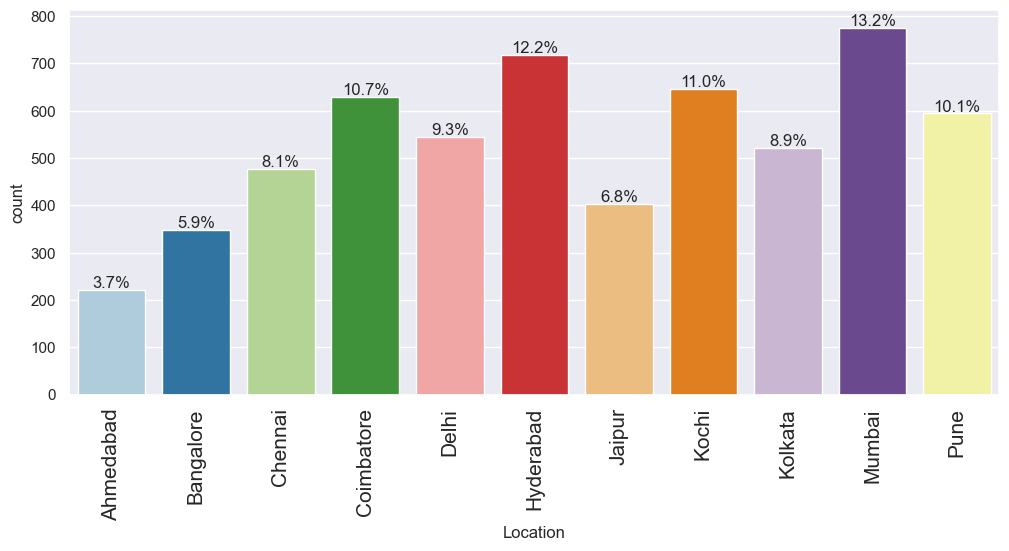

In [35]:
labeled_barplot(df, "Location", perc=True)

- Majority of the cars are in Mumbia

***Fuel Type***

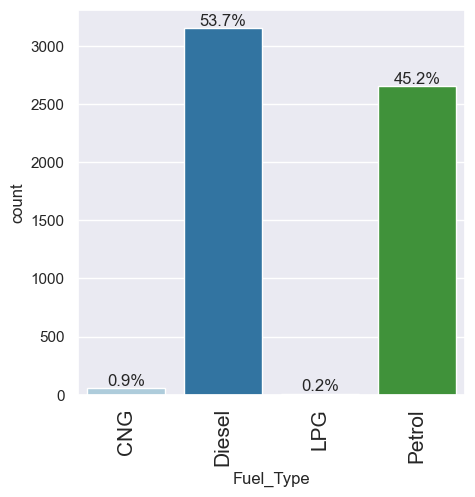

In [36]:
labeled_barplot(df, "Fuel_Type", perc=True)

**Observations**

- Diesel and petrol engine car account to 98% of the cars in the distribution, with most being Diesel

***Transmission***

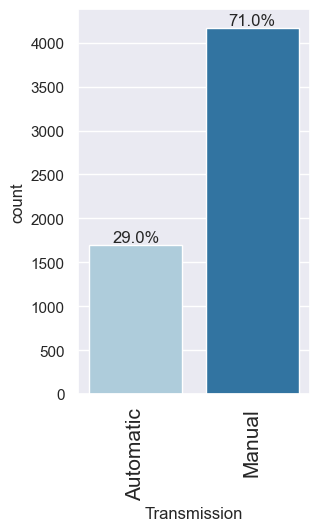

In [37]:
labeled_barplot(df, "Transmission", perc=True)

**Observations**

- Most of the cars are manual

***Owner Type***

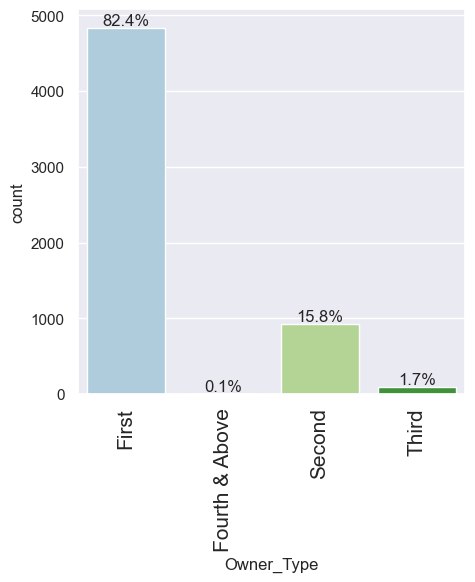

In [38]:
labeled_barplot(df, "Owner_Type", perc=True)

**Observations**

- Most of the cars are sold by 1st buyers

## Bivariate Analysis

**Let's check the correlation between numerical columns.**

C:\Users\User\AppData\Local\Temp\ipykernel_21520\3859020170.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")


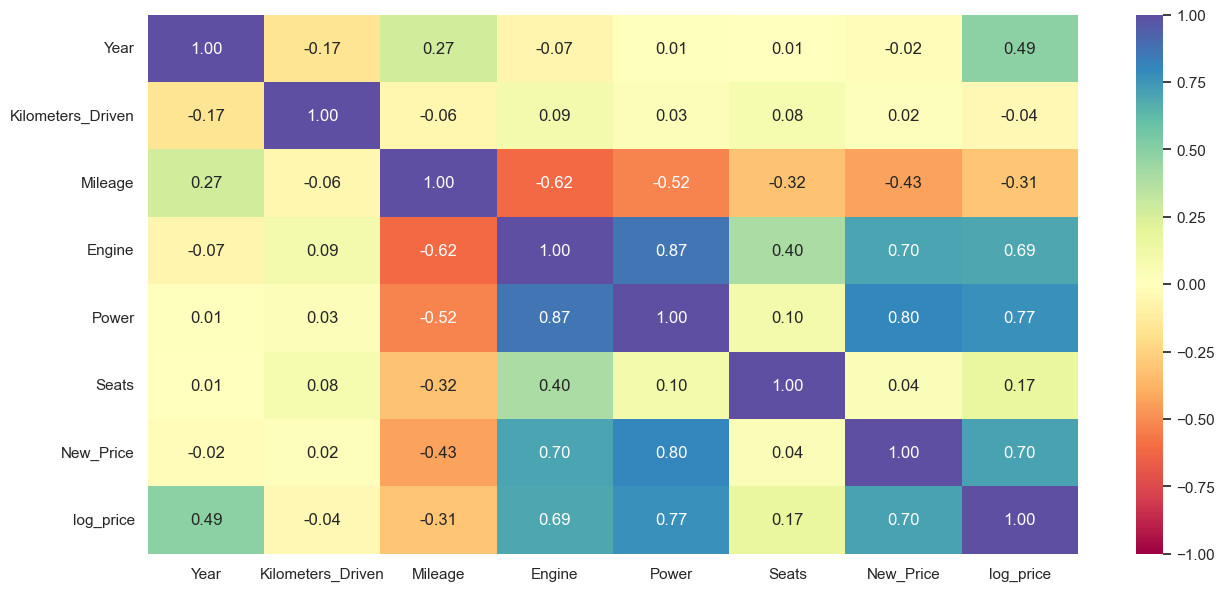

In [39]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- *log_price* is highly correlated with *Engine* (0.69), *Power* (0.77), and *New_Price* (0.70).
- *New price*, *Power*  and *Engine* have high positive correlation.

**Let's check the variation in *log_price* with some of the other variables.**

***Engine* vs *log price***

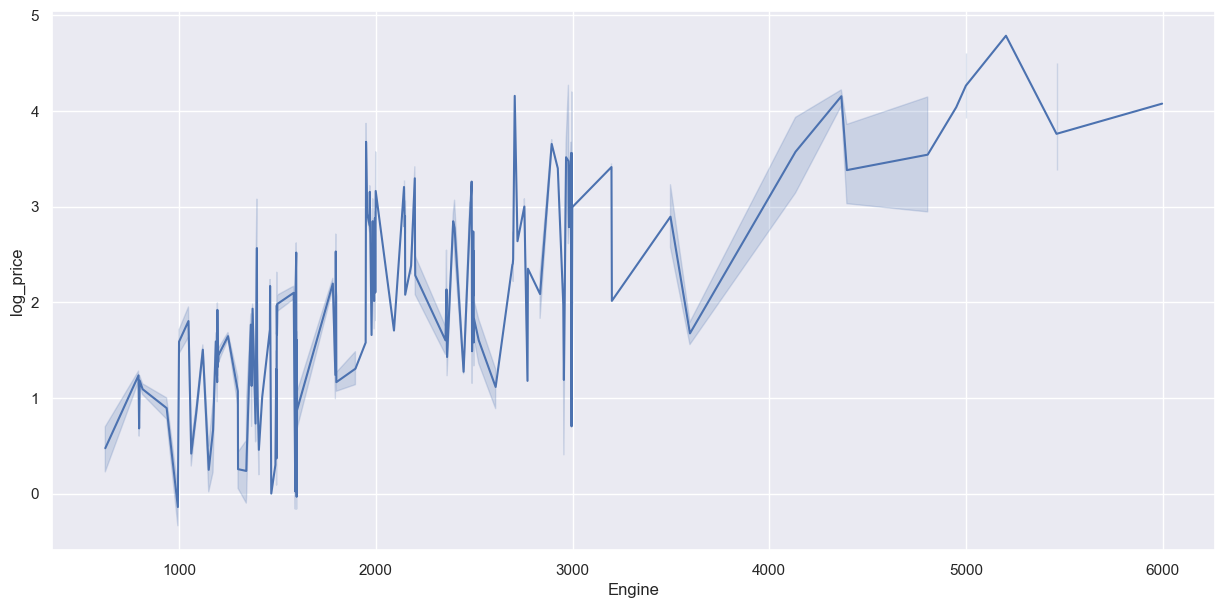

In [40]:
plt.figure(figsize=(15, 7))
sns.lineplot(y="log_price", x="Engine", data=df)
plt.show()

**Observations**
 
- The price increases with the engine capacity

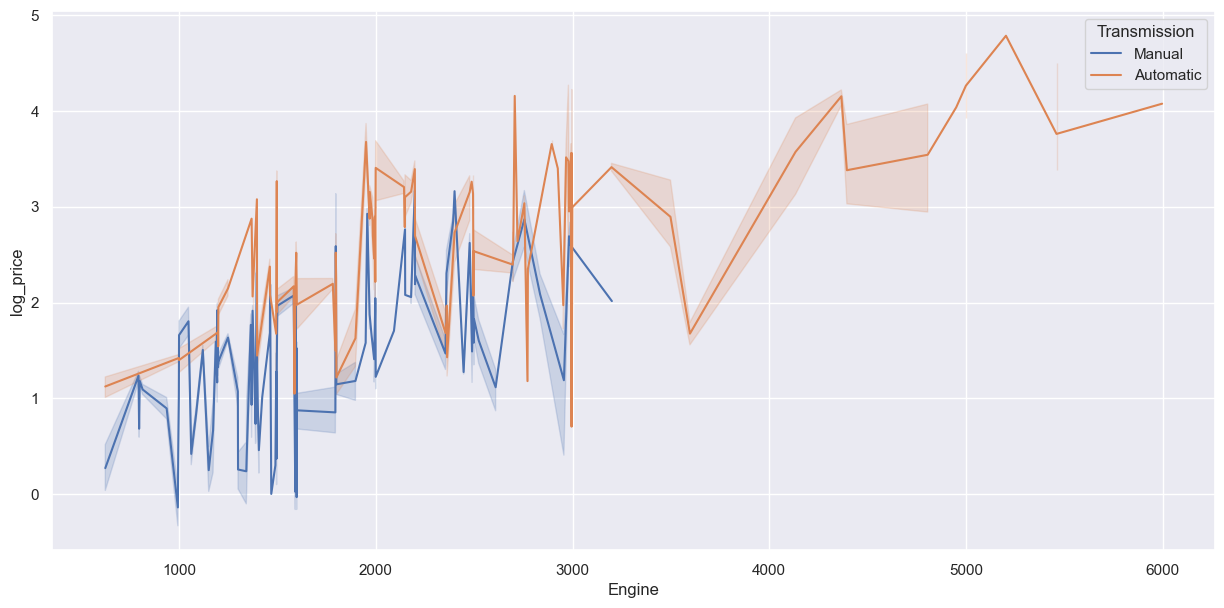

In [41]:
plt.figure(figsize=(15, 7))
sns.lineplot(y="log_price", x="Engine", data=df, hue='Transmission')
plt.show()

**Observations**
 
- Cars with bigger engine capacity are automatic

***Power* vs *log price***

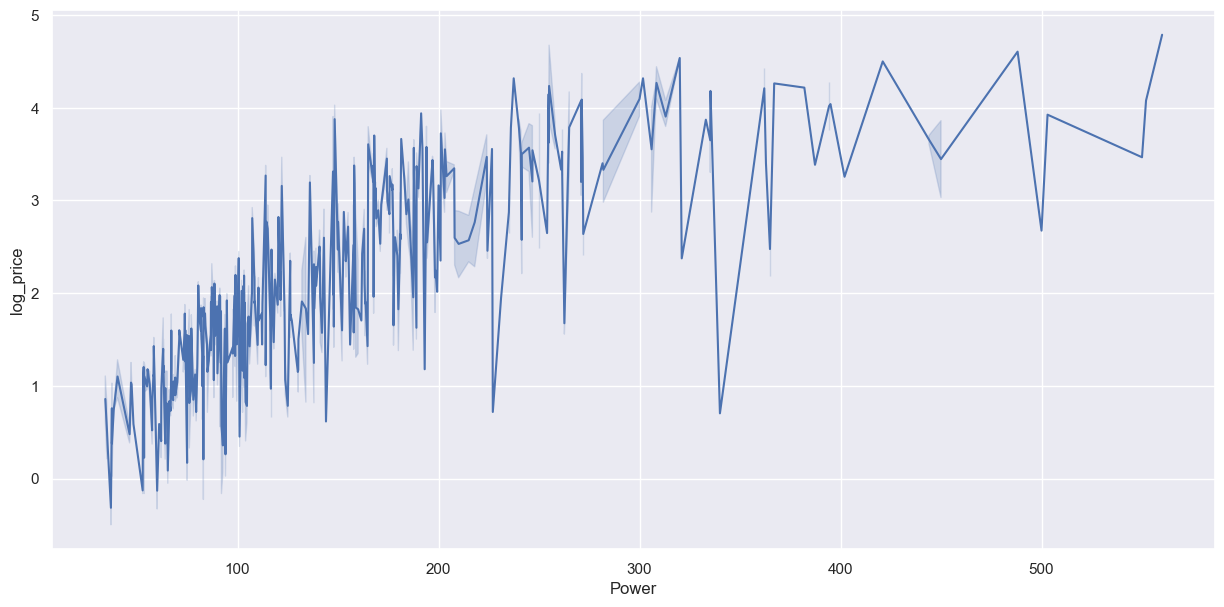

In [42]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="Power", y="log_price", data=df)
plt.show()

**Observations**
 
- The price increases with the power of the car

***New Price* vs *log price***

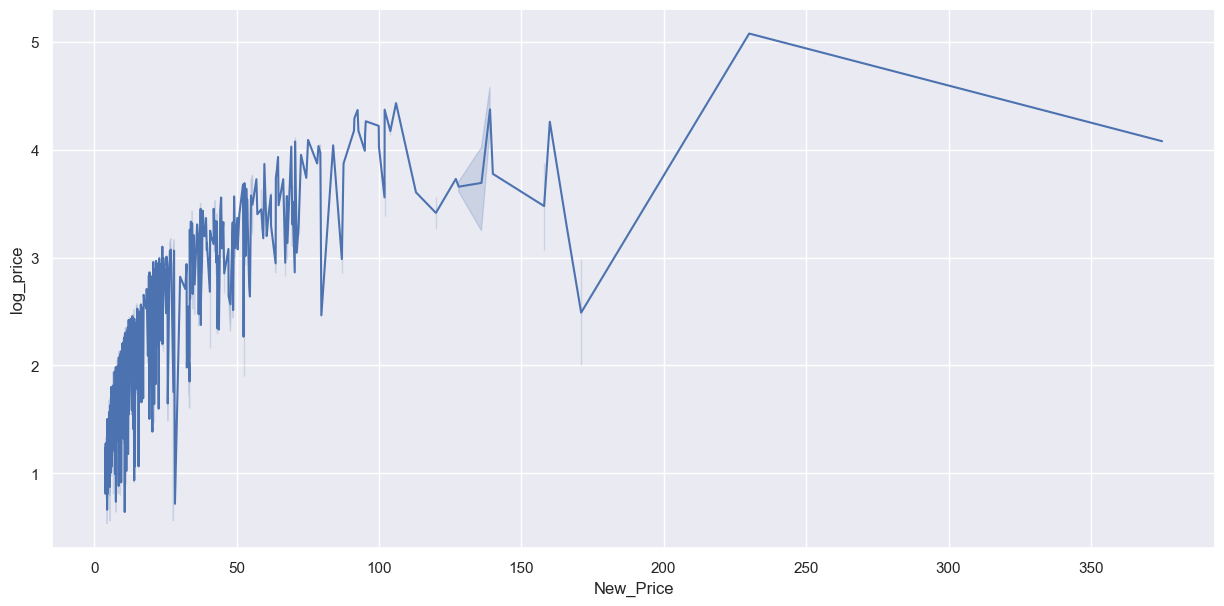

In [43]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="New_Price", y="log_price", data=df)
plt.show()

**Observations**
 
- The New price determines the price of the used car

***Year* vs *log price***

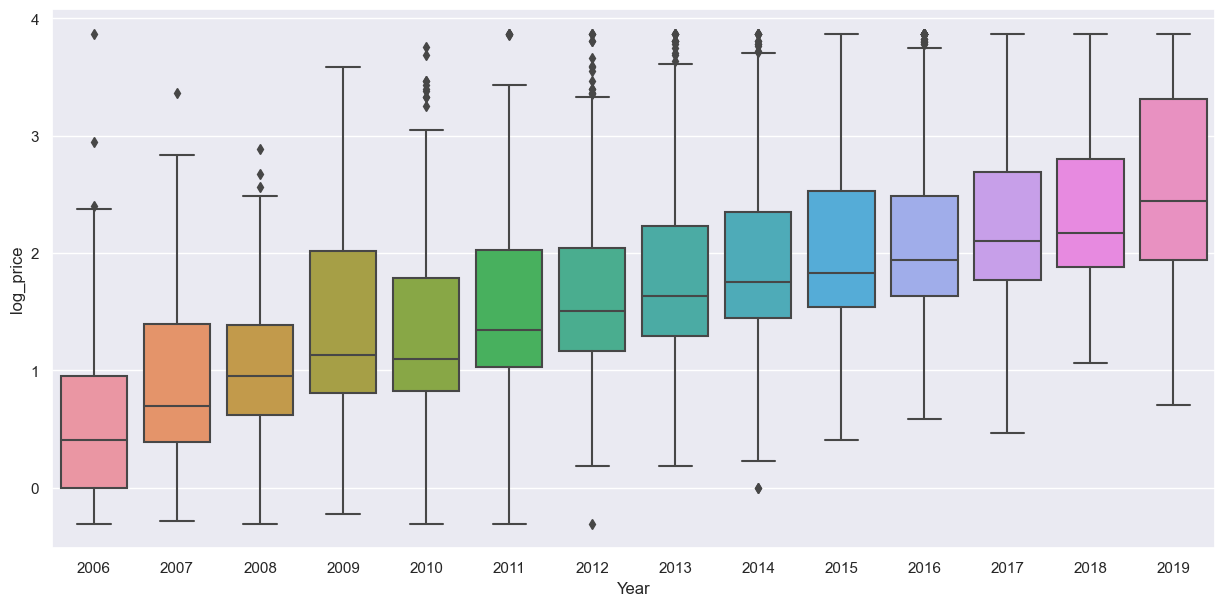

In [83]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Year", y="log_price", data=df)
plt.show()

**Observations**
 
- Newer cars are most expensive

***Mileage* vs *log price***

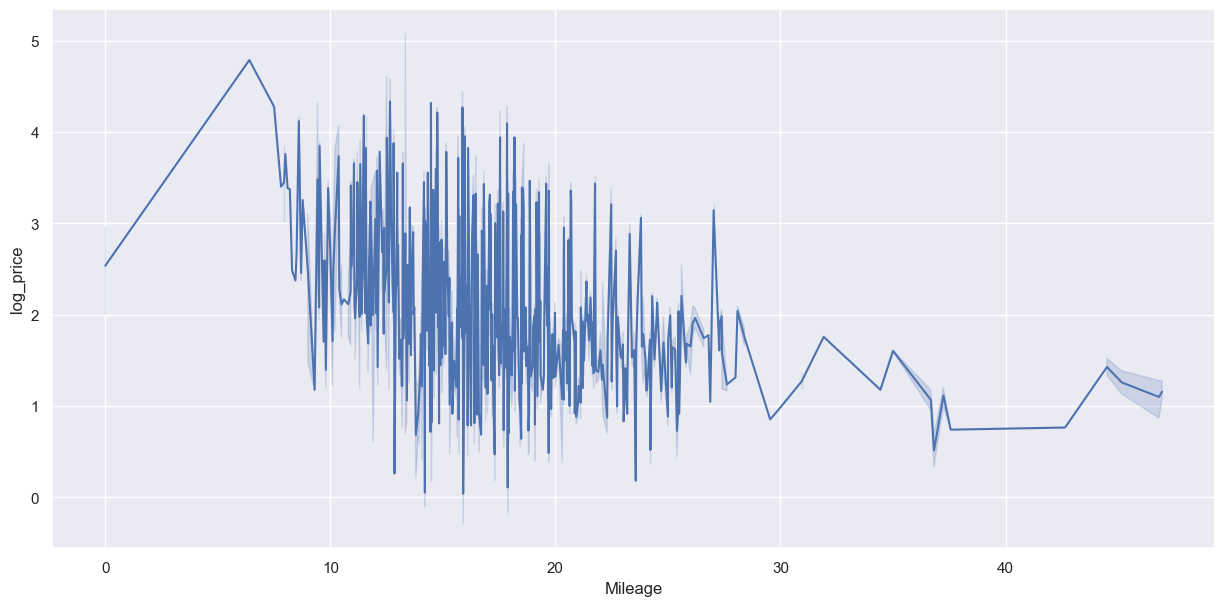

In [45]:
plt.figure(figsize=(15, 7))
sns.lineplot(x="Mileage", y="log_price", data=df)
plt.show()

**Observations**
 
- Price tends to decrease a little with increasing mileage

## Data Preprocessing

### Missing Value Treatment

- Let's check for missing values in the data.

In [46]:
# check for missing values

df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
log_price            0
dtype: int64

**Observation**

- Recall that we have treated them earlier

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5871.0,2013.478794,3.163708,1998.000000,2012.000000,2014.0000,2016.000000,2.019000e+03
Kilometers_Driven,5871.0,58318.041901,92177.225919,171.000000,33420.000000,52618.0000,72405.500000,6.500000e+06
Mileage,5871.0,18.386625,4.680693,0.000000,15.290000,18.3300,21.100000,4.695600e+01
Engine,5871.0,1625.886902,601.595539,624.000000,1198.000000,1496.0000,1991.000000,5.998000e+03
Power,5871.0,113.288302,53.879389,34.200000,75.000000,97.7000,138.100000,5.600000e+02
Seats,5871.0,5.283768,0.805141,2.000000,5.000000,5.0000,5.000000,1.000000e+01
New_Price,5871.0,21.638734,24.279083,3.910000,7.965000,11.3000,23.165000,3.750000e+02
log_price,5871.0,1.845760,0.863916,-0.820981,1.258461,1.7492,2.302585,5.075174e+00


**Observation**

- Deal the the entry that has zero mileage

In [48]:
# Calculate the median of the column
median = df['Mileage'].median()

# Replace the entries in Mileage column that are equal to zero with the median
df['Mileage'] = df['Mileage'].where(df['Mileage'] != 0, median)

### Outlier Detection

- Let's check for outliers in the data.

In [49]:
# select only numerical columns 

num_cols = df.select_dtypes(include='number').columns.to_list()

num_cols


['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'log_price']

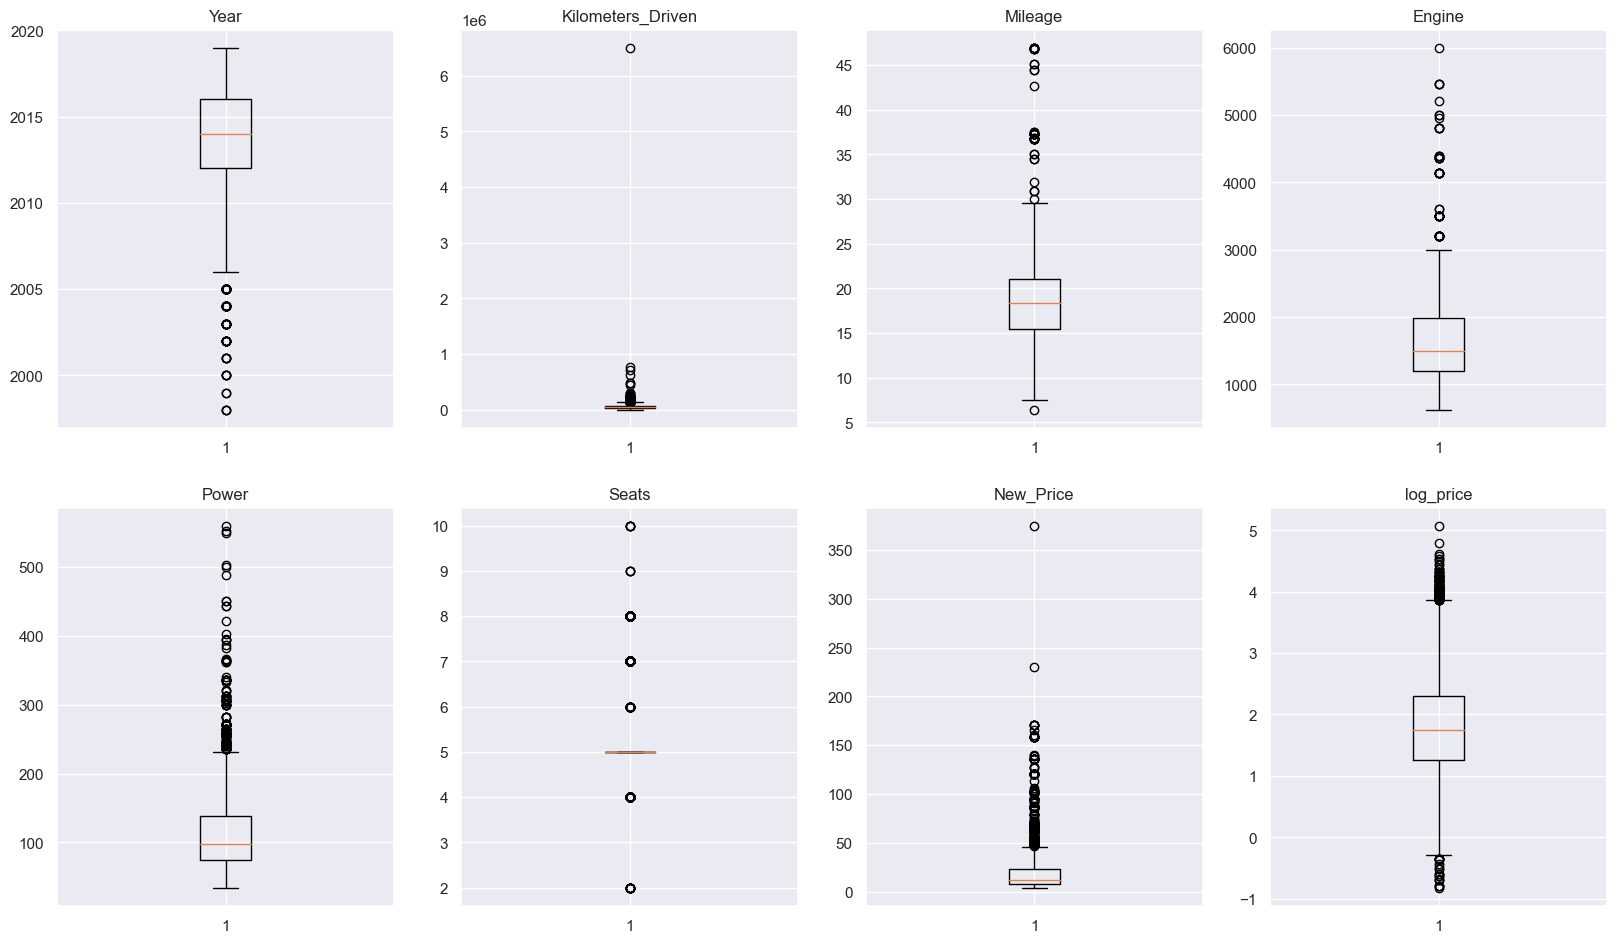

In [50]:
# outlier detection using boxplot
# use the numeric columns we created above
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable])
#     plt.tight_layout()  # to avoid the title from overlapping
    plt.title(variable)

plt.show() 

In [51]:
df.head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,log_price
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,5.51,0.559616
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,16.06,2.525729
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,8.61,1.504077
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,11.27,1.791759
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,53.14,2.875822
5,Hyderabad,2012,75000,LPG,Manual,First,29.54,814,55.20,5.0,10.25,0.854415
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461,63.10,5.0,9.47,1.252763
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755,171.50,8.0,21.00,2.862201
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598,103.60,5.0,13.23,1.648659
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248,74.00,5.0,7.63,0.667829


**Observations**

- All numerical variables have outliers.
- *Mileage*, *Engine*, *Power* and *New_Price* have only upper outliers.
- Year have only lower outliers.
- *log_price* has both upper and lower outliers.

### Outlier Treatment

- Let's treat all the outliers by flooring and capping.

In [52]:
# illustrate clipping values to minimum and maximum

l1 = [-200, 5, 0, 1000]

# use np.clip function


In [53]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(
        df[col], Lower_Whisker, Upper_Whisker
    )  # all the values samller than Lower_Whisker will be assigned value of Lower_whisker
    # and all the values above upper_whisker will be assigned value of upper_Whisker
    return df


def treat_outliers_all(df, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

In [54]:
# treating the outliers
#numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, num_cols)

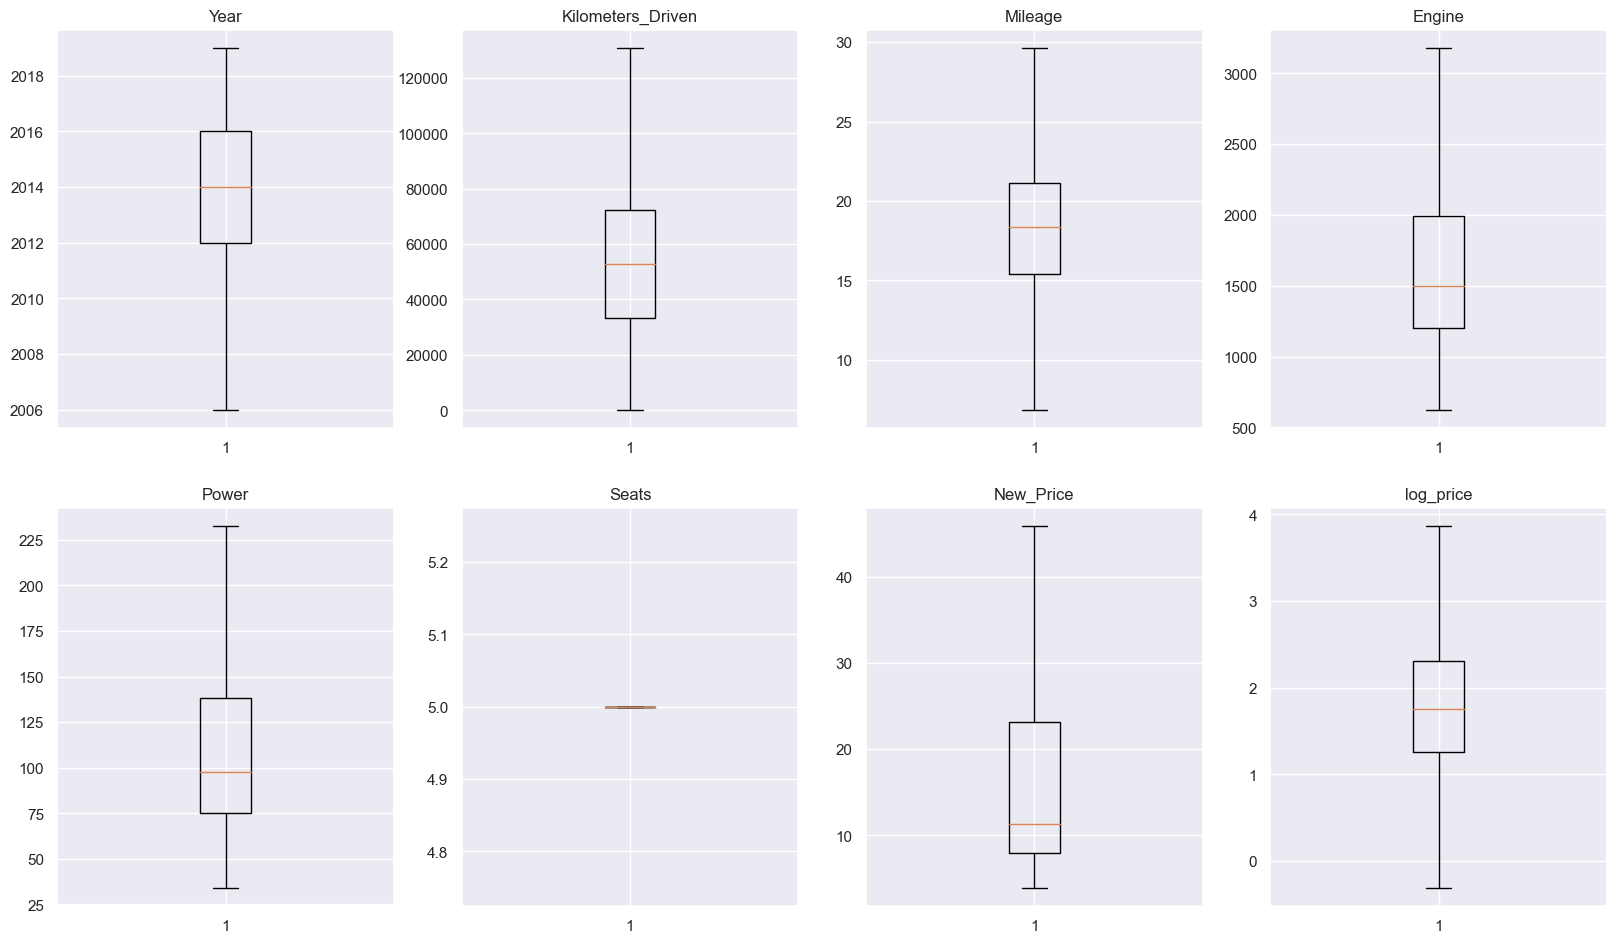

In [55]:
# let's look at the boxplots to see if the outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    #plt.tight_layout()
    plt.title(variable)

plt.show()

## Linear Model Building

1. We want to predict the log of price.

2. Before we proceed to build a model, we'll have to encode categorical features.

3. We'll split the data into train and test to be able to evaluate the model that we build on the train data.

4. We will build a Linear Regression model using the train data and then check it's performance.

In [56]:
# defining the dependent and independent variables

X = df.drop('log_price', axis=1)
y = df['log_price']


In [57]:
# creating dummy variables

X = pd.get_dummies(X, drop_first=True)

X


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,New_Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000.0,29.65,998.0,58.16,5.0,5.510,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2015,41000.0,19.67,1582.0,126.20,5.0,16.060,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2011,46000.0,18.20,1199.0,88.70,5.0,8.610,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000.0,20.77,1248.0,88.76,5.0,11.270,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2013,40670.0,15.20,1968.0,140.80,5.0,45.965,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,2014,27365.0,28.40,1248.0,74.00,5.0,7.880,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
6014,2015,100000.0,24.40,1120.0,71.00,5.0,8.230,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
6015,2012,55000.0,14.00,2498.0,112.00,5.0,11.670,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0
6016,2013,46000.0,18.90,998.0,67.10,5.0,5.510,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0


In [58]:
# splitting the data in 80:20 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [59]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 4696
Number of rows in test data = 1175


### Normalize the data

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [61]:
# fitting the linear model

lin_reg = LinearRegression()

lin_reg.fit(X_train_sc, y_train)


LinearRegression()

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [80]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape
        },
        index=[0],
    )

    return df_perf

In [81]:
# Checking model performance on train set

train_pf = model_performance_regression(lin_reg, X_train_sc, y_train)

train_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.240493,0.178347,0.918981,0.918564,inf


In [66]:
# Checking model performance on test set

test_pf = model_performance_regression(lin_reg, X_test_sc, y_test)

test_pf

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.236716,0.179096,0.925763,0.924213,inf


**Observations**

* Root Mean Squared Error of train and test data is somewhat similar. 
* Mean Absolute Error indicates that our current model is able to predict the log of the price of a used car within mean error of 0.17 on test data.


### Forward Feature Selection

- Let us try using forward feature selection on the data to check if we can get a good model performance using a lesser number of features.

In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

# Build step forward feature selection
sfs = SFS(
    reg,
    k_features=X_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(X_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    4.7s finished

[2023-02-12 04:06:33] Features: 1/24 -- score: 0.6237931085851838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2023-02-12 04:06:33] Features: 2/24 -- score: 0.8464417411322362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.2s finished

[2023-02-12 04:06:34] Features: 3/24 -- score: 0.8916739537476508[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21

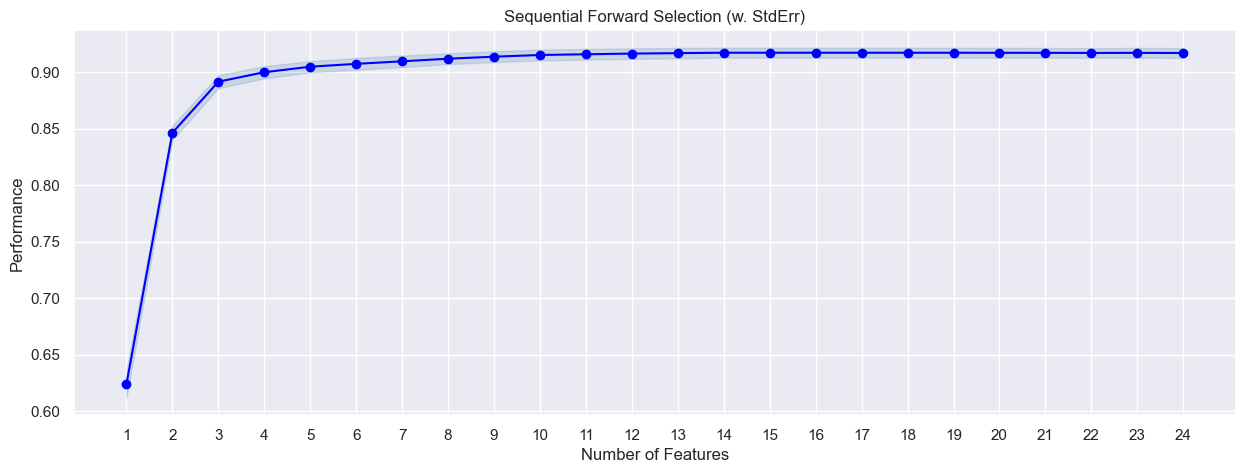

In [68]:
# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.show()

Observations

The model performance appears to have become constant somewhere around 7 features.
We will take 7 as the number of features to consider.

In [69]:
reg = LinearRegression()

# # Build step forward feature selection

sfs = SFS(
    reg,
    k_features=7,
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFS
sfs = sfs.fit(X_train_sc, y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.1s finished

[2023-02-12 04:08:35] Features: 1/7 -- score: 0.6237931085851838[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.1s finished

[2023-02-12 04:08:36] Features: 2/7 -- score: 0.8464417411322362[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2023-02-12 04:08:36] Features: 3/7 -- score: 0.8916739537476508[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2023-02-12 04:08:36] Features: 4/7 -- score: 0.900039

In [70]:
# important features

feat_cols = list(sfs.k_feature_idx_)

feat_cols


[0, 3, 4, 6, 11, 14, 17]

In [71]:
X_train_new = X_train[X_train.columns[feat_cols]]
X_test_new = X_test[X_test.columns[feat_cols]]

**Now we will fit a sklearn model using these features only.**

In [72]:
# scaling the new data with 7 features

X_train_new_sc = scaler.fit_transform(X_train_new)
X_test_new_sc = scaler.transform(X_test_new)

In [73]:
# Fitting linear model

lin_reg2 = LinearRegression()

lin_reg2.fit(X_train_new_sc, y_train)

LinearRegression()

In [74]:
# model performance on train set
print("Training Performance:")

train_pf2 = model_performance_regression(lin_reg2, X_train_new_sc, y_train)
train_pf2


Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.252561,0.188455,0.910646,0.910512,inf


In [75]:
# model performance on test set
print("Test Performance:")

test_pf2 = model_performance_regression(lin_reg2, X_test_new_sc, y_test)
test_pf2

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.251944,0.188597,0.915904,0.9154,inf


In [78]:
# training performance comparison

models_train_comp_df = pd.concat(
    [train_pf.T, train_pf2.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.240493,0.252561
MAE,0.178347,0.188455
R-squared,0.918981,0.910646
Adj. R-squared,0.918564,0.910512
MAPE,inf,inf


In [79]:
# test performance comparison

models_test_comp_df = pd.concat(
    [test_pf.T, test_pf2.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.236716,0.251944
MAE,0.179096,0.188597
R-squared,0.925763,0.915904
Adj. R-squared,0.924213,0.915400
MAPE,inf,inf


**We will choose our initial model (*lin_reg*) as the final model as it gives slightly better performance and we do not have too many features to discard.**

## Insights

1. From our linear regression model, we can explain ~92% of the variation in our data.


2. From the Analysis, Features like *Engine*, *Power*, *Year of release* and *the price of the new car* will tend to increase the log of the used price and features like *Mileage* will tend to decrease the log of the price of used cars.

In [ ]:
## Business Recommendations

- Our final linear regression model has an adjusted R-Squared of 92% on both training and testing, which means that we are able to predict within 92% of the log of price for used cars.


- Renting our rooms which can accommodate more people will fetch more revenue. Such rooms will generally be entire homes/apartments.


- The focus should be on providing a comfortable stay and better service to the customers to drive the review score ratings higher.


- We should explore data from other periods of time and about the ratings of services offered (dining, laundry, etc.). An analysis of the text reviews can also be conducted to gain an understanding of customer sentiment.



- We will also have to analyze the cost side of things before we can talk about profitability in the business. We should gather data regarding that.